In [1]:
# [Urvi Palvankar]
# [20196232]
# [MMA 2020-2021]
# [2020-2021 (Section 2)]
# [MMA 869]
# [16/08/2020]

# 1. HOW LOVELY - ANSWER TO QUESTION 1 - PART 1

# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import itertools

import scipy

import pandas_profiling

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# This will ensure that matplotlib figures don't get cut off when saving with savefig()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


# READ THE DATA

In [3]:
#Reading the data
df_jewelry = pd.read_csv("https://raw.githubusercontent.com/stepthom/sandbox/master/data/jewelry_customers.csv")

#Vieweing Data to see all the features within the dataset
list(df_jewelry)
df_jewelry.shape
df_jewelry.info()
df_jewelry.describe().transpose()
df_jewelry.head(n=10)
df_jewelry.tail(n=10)

['Age', 'Income', 'SpendingScore', 'Savings']

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


,Age,Income,SpendingScore,Savings
495,66,77052,0.707262,6296.417311
496,22,132948,0.889800,2839.786357
497,91,30756,0.303698,15492.004711
498,30,98030,0.411112,16316.842905
499,25,128625,0.816739,4914.117127
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445
504,89,30267,0.289310,14386.351880


In [4]:
#Using Pandas Profiling to get a deeper view into the data 
#Missing Vlaues, All Feature interactions, correlations are captured using pandas profiling

pandas_profiling.ProfileReport(df_jewelry)

# NORMALIZING AND SCALING DATA

In [5]:
#Scaling Data - Standardization 
#Data is scaled so that all numbers can be viewed at one standard level
X= df_jewelry.copy()
scaler = StandardScaler()
features = list(X.select_dtypes(include=np.number).columns)
X[features] = scaler.fit_transform(X[features])
X.head(5)


,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686


# K-MEANS MODEL

In [6]:
#Clustering Algorithms are used to generate clusters for unsupervised data 
#Running K means model for a range of K (2 to 20) - Hyper Parameter Tuning
inertias = {}
silhouettes = {}
for k in range(2, 20):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42)
    kmeans = kmeans.fit(X)
    inertias[k] = kmeans.inertia_
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')

#Displaying inertias and silhouette scores
print('Inertia Values k-Means: \n'+ str(inertias))
print('\nSilhouette Scores k-Means: \n'+str(silhouettes))

#Highest Silhouette Coefficient value is when K=5

Inertia Values k-Means: 
{2: 1022.3905044613805, 3: 384.81118593043806, 4: 189.7017879665956, 5: 66.51111374859076, 6: 61.14438411779816, 7: 56.892795315756366, 8: 52.91645639809087, 9: 50.24692631556181, 10: 48.02288807226927, 11: 45.77582549083751, 12: 44.184202105662955, 13: 42.34197085430188, 14: 41.03789954116341, 15: 39.706697405626926, 16: 38.20248355819624, 17: 37.16443375324384, 18: 36.15390816171677, 19: 35.48616413142442}

Silhouette Scores k-Means: 
{2: 0.5212589967674505, 3: 0.6963481945884472, 4: 0.7581191889903789, 5: 0.8048976287755765, 6: 0.6329321562095103, 7: 0.44624135722251396, 8: 0.2966712516286317, 9: 0.2977611570470311, 10: 0.24875420845031, 11: 0.24077384705449392, 12: 0.2465014631108264, 13: 0.2281834771325568, 14: 0.22602177447136323, 15: 0.22620625714232734, 16: 0.2343111100251569, 17: 0.23153325020401216, 18: 0.23196933468490163, 19: 0.1972900362636937}


## Elbow Graph Inertias -  (DECIDING OPTIMAL K)

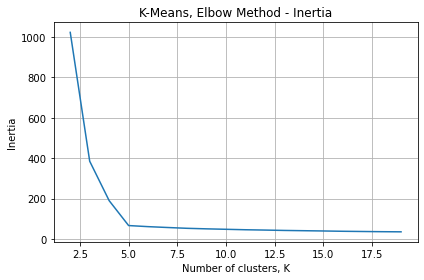

In [7]:
#Elbow graph is used to determine the optimal K (Hyper Parameter) - If you see inertia after k=5 stops to decrease at a fast rate
#And hence causes this point to be the elbow in this case
plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method - Inertia')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");

## Elbow Graph for Silhouette Score - (DECIDING OPTIMAL K)

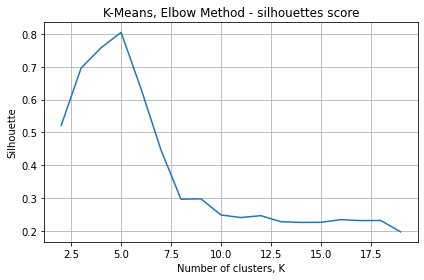

In [8]:
#Elbow graph is used to determine the optimal K (Hyper Parameter) - If you see Silhouette score after k=5 the scores starts to decline
#And hence causes this point to be the elbow in this case
plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()),list(silhouettes.values()));
plt.title('K-Means, Elbow Method - silhouettes score')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");


## Finalizing on K-Means model

In [9]:
#Since k=5 has the highest silhouette score - running k means at k=5
k_means_final = KMeans(init='k-means++', n_init=10, n_clusters=5, max_iter=1000, random_state=42)
k_means_final = k_means_final.fit(X)

#Displaying Inertia and Sikhouette score
print('Inertia k-Means: ' +str(k_means_final.inertia_))
print('\nSilhouette Score k-Means: '+ str(silhouette_score(X, k_means_final.labels_, metric='euclidean')))

#Finding out what the cluster centres are
print('\n CLuster Centres k-Means:\n' +str(k_means_final.cluster_centers_))

#Saving cluster labels
labels_kmeans = k_means_final.labels_

Inertia k-Means: 66.51111374859076

Silhouette Score k-Means: 0.8048976287755765

 CLuster Centres k-Means:
[[ 1.19238486 -1.32510593 -0.67963841  0.97016358]
 [-1.08815238  0.82744102 -0.75240648  0.6270464 ]
 [ 0.03879611 -0.08524639  1.02721559 -1.00569483]
 [-1.44466803  1.46050665  1.51057952 -1.57249636]
 [ 1.11876151  1.23565419 -1.68367042  0.59588052]]


# CLUSTER ANALYSIS - USING K-MEANS MODEL

In [10]:
#Adding Cluster labels(K-Means) to the data
X_tmp=df_jewelry.copy()
X_tmp['Cluster ID']=labels_kmeans
X_tmp

,Age,Income,SpendingScore,Savings,Cluster ID
0,58,77769,0.791329,6559.829923,2
1,59,81799,0.791082,5417.661426,2
2,62,74751,0.702657,9258.992965,2
3,59,74373,0.765680,7346.334504,2
4,87,17760,0.348778,16869.507130,0
...,...,...,...,...,...
500,28,101206,0.387441,14936.775389,1
501,93,19934,0.203140,17969.693769,0
502,90,35297,0.355149,16091.401954,0
503,91,20681,0.354679,18401.088445,0


## Cluster Statistics

In [11]:
#Cluster Analysis and Statistics for each cluster using Kmeans Model Results
X_tmp.describe(include=[np.number]).transpose()
for label in set(k_means_final.labels_):
    print('\nCluster {}:'.format(label))
    pd.set_option("display.precision", 2)
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    X_label = X_tmp[k_means_final.labels_==label].copy()
    X_label.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0
Cluster ID,505.0,1.366337,1.145408,0.0,0.000000,1.000000,2.000000,4.0



Cluster 0:


,count,mean,std,min,25%,50%,75%,max
Age,147.00,87.78,3.51,79.00,85.00,88.00,91.00,97.00
Income,147.00,27866.10,6448.81,12000.00,23361.00,27771.00,32601.00,46977.00
SpendingScore,147.00,0.33,0.05,0.20,0.30,0.32,0.36,0.47
Savings,147.00,16659.26,1183.85,13470.97,15957.28,16711.07,17433.13,20000.00
Cluster ID,147.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00



Cluster 1:


,count,mean,std,min,25%,50%,75%,max
Age,126.00,32.78,3.79,22.00,30.00,33.00,35.00,44.00
Income,126.00,105265.81,6080.62,89598.00,100760.25,106002.50,108858.75,119877.00
SpendingScore,126.00,0.31,0.05,0.17,0.28,0.31,0.34,0.41
Savings,126.00,14962.78,1061.73,12207.53,14223.79,14976.94,15682.29,17968.55
Cluster ID,126.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00



Cluster 2:


,count,mean,std,min,25%,50%,75%,max
Age,157.00,59.96,3.38,51.00,58.00,59.00,62.00,68.00
Income,157.00,72448.06,6240.26,56321.00,68463.00,72027.00,76594.00,90422.00
SpendingScore,157.00,0.77,0.05,0.66,0.74,0.77,0.80,0.91
Savings,157.00,6889.97,1052.28,4077.66,6225.38,6845.06,7497.23,10547.78
Cluster ID,157.00,2.00,0.00,2.00,2.00,2.00,2.00,2.00



Cluster 3:


,count,mean,std,min,25%,50%,75%,max
Age,50.00,24.18,3.66,17.00,22.00,24.50,27.00,31.00
Income,50.00,128029.12,5688.90,117108.00,123042.00,128162.00,131435.75,142000.00
SpendingScore,50.00,0.90,0.04,0.81,0.87,0.89,0.93,1.00
Savings,50.00,4087.52,1277.75,0.00,3275.32,4361.97,4986.86,6089.48
Cluster ID,50.00,3.00,0.00,3.00,3.00,3.00,3.00,3.00



Cluster 4:


,count,mean,std,min,25%,50%,75%,max
Age,25.00,86.00,3.66,77.00,84.00,86.00,88.00,93.00
Income,25.00,119944.04,4941.05,110582.00,117347.00,119429.00,123651.00,128596.00
SpendingScore,25.00,0.07,0.04,0.00,0.04,0.06,0.08,0.16
Savings,25.00,14808.68,1159.34,12554.69,14047.39,14773.41,15391.95,17833.09
Cluster ID,25.00,4.00,0.00,4.00,4.00,4.00,4.00,4.00


## Finding Examplars

In [12]:
#Finding Examplars for each cluster - This will help us dig deeper into the persona building
from scipy.spatial import distance

for i, label in enumerate(set(k_means_final.labels_)):    
    X_tmp = df_jewelry[k_means_final.labels_==label].copy()
    
    exemplar_idx = distance.cdist([k_means_final.cluster_centers_[i]], X_tmp).argmin()
    exemplar = pd.DataFrame(X_tmp.iloc[exemplar_idx])
   
    print('\nCluster {}:'.format(label))
    exemplar


Cluster 0:


,320
Age,87.00
Income,12000.00
SpendingScore,0.34
Savings,16180.27



Cluster 1:


,339
Age,34.00
Income,89598.00
SpendingScore,0.34
Savings,12832.77



Cluster 2:


,278
Age,59.00
Income,56321.00
SpendingScore,0.81
Savings,6129.29



Cluster 3:


,360
Age,28.00
Income,117108.00
SpendingScore,0.86
Savings,4749.88



Cluster 4:


,368
Age,84.00
Income,110582.00
SpendingScore,0.08
Savings,14938.00


# Generating Other Clustering Alorithms

## Model 2 - DBSCAN

### DBSCAN Hyper Parameter Tuning

In [13]:
#DSCAN Algorithm is also a clustering algorithm
#Hyper Parameter tuning for eps, min_samples and metric

def fun_dbscan(X, eps, min_samples, metric):
    db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric).fit(X)

    unique_labels = set(db.labels_)
    n_clusters = len(unique_labels)
    
    if n_clusters <= 1:
        print('eps={}, min_samples={}, metric={}, n_clusters <= 1. Returning.'.format(eps, min_samples, metric))
        return
    
    sil_dbscan = silhouette_score(X, db.labels_)
    print("\nDBSCAN: eps={}, min_samples={}, metric={}, n_clusters={}, sil={}".format(eps, min_samples, metric, n_clusters, sil_dbscan))
    
e = [0.1, 0.2, 0.3, 0.4, 0.5,0.6]
n = [3, 4, 5, 6]
m = ['euclidean','cosine', 'chebyshev']

for prod in list(itertools.product(e, n, m)):
    fun_dbscan(X, prod[0], prod[1], prod[2])
    
#Highest Silhoutte score is at various levels - But I finialized on eps =0.5, min_samples = 5 and metric = euclidean


DBSCAN: eps=0.1, min_samples=3, metric=euclidean, n_clusters=15, sil=-0.6313739076946371

DBSCAN: eps=0.1, min_samples=3, metric=cosine, n_clusters=4, sil=0.7325442796658956

DBSCAN: eps=0.1, min_samples=3, metric=chebyshev, n_clusters=23, sil=-0.3914657748854894

DBSCAN: eps=0.1, min_samples=4, metric=euclidean, n_clusters=4, sil=-0.4590423145194752

DBSCAN: eps=0.1, min_samples=4, metric=cosine, n_clusters=4, sil=0.7325442796658956

DBSCAN: eps=0.1, min_samples=4, metric=chebyshev, n_clusters=14, sil=-0.4632343925755609

DBSCAN: eps=0.1, min_samples=5, metric=euclidean, n_clusters=3, sil=-0.17554431615393226

DBSCAN: eps=0.1, min_samples=5, metric=cosine, n_clusters=4, sil=0.7325442796658956

DBSCAN: eps=0.1, min_samples=5, metric=chebyshev, n_clusters=13, sil=-0.5250710898917323

DBSCAN: eps=0.1, min_samples=6, metric=euclidean, n_clusters=2, sil=-0.17493225898474807

DBSCAN: eps=0.1, min_samples=6, metric=cosine, n_clusters=4, sil=0.7325442796658956

DBSCAN: eps=0.1, min_samples=6

### Graphing Eblow Graph - Silhouette Coefficients


Silhouette Scores DBSCAN:
{(0.1, 3): -0.6313739076946371, (0.2, 3): 0.21650895666875325, (0.30000000000000004, 3): 0.7679653694292776, (0.4, 3): 0.7965062016314277, (0.5, 3): 0.8048976287755765, (0.1, 4): -0.4590423145194752, (0.2, 4): 0.29103834394984224, (0.30000000000000004, 4): 0.7647456695321839, (0.4, 4): 0.7965062016314277, (0.5, 4): 0.8048976287755765, (0.1, 5): -0.17554431615393226, (0.2, 5): 0.37355056274945037, (0.30000000000000004, 5): 0.7647456695321839, (0.4, 5): 0.7965062016314277, (0.5, 5): 0.8048976287755765, (0.1, 6): -0.17493225898474807, (0.2, 6): 0.33843571870862393, (0.30000000000000004, 6): 0.7596175101273176, (0.4, 6): 0.7965062016314277, (0.5, 6): 0.8048976287755765}


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'DBSCAN, Elbow Method')

Text(0.5, 0, 'Eps')

Text(0, 0.5, 'Silhouette')

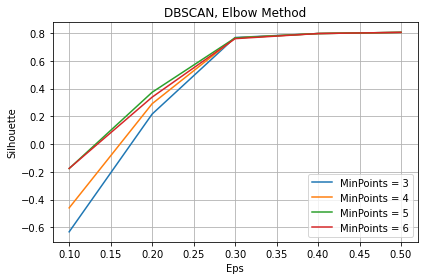

In [18]:
#Graphing elbow graph to determine the most optimal eps and min_samples using silhouette scores
silhouettes_dbscan = {}
i=0
for min_samples in range(3,7,1):
    for eps in np.arange(0.1, 0.6, 0.1):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        silhouettes_dbscan[eps,min_samples]=silhouette_score(X, db.labels_, metric='euclidean')
print('\nSilhouette Scores DBSCAN:\n' +str(silhouettes_dbscan))

#Graph
min_samples_3 = list(silhouettes_dbscan.values())[0:5]
min_samples_4 = list(silhouettes_dbscan.values())[5:10]
min_samples_5 = list(silhouettes_dbscan.values())[10:15]
min_samples_6 = list(silhouettes_dbscan.values())[15:20]

epss = [0.1, 0.2, 0.3, 0.4, 0.5]

plt.figure();
plt.plot(list(epss), list(min_samples_3));
plt.plot(list(epss), list(min_samples_4));
plt.plot(list(epss), list(min_samples_5));
plt.plot(list(epss), list(min_samples_6));
plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.grid(True);
plt.legend(['MinPoints = 3', 'MinPoints = 4', 'MinPoints = 5', 'MinPoints = 6'], loc='lower right')

### Finalizing the DBSCAN Model with best hyper parameters

In [19]:
#Building DBSCAN using hyper parameters that generated highest Silhouette score 
db = DBSCAN(eps=0.5, min_samples=5, metric='euclidean').fit(X)

#Silhouette score for the final DBSCAN Model
silhouettes_score=silhouette_score(X, db.labels_, metric='euclidean')
print('\nSilhouette Score DBSCAN: ' +str(silhouettes_score))

#Saving labels from DBSCAN Clustering Algorithm
labels_DBSCAN=db.labels_


Silhouette Score DBSCAN: 0.8048976287755765


## Model 3 - HIERARCHICAL MODEL

### Hierarchical Hyper Parameter Tuning

In [20]:
#Building Hierarchical Model with various Hyper Parameter Tuning (Linkages and metrics)
def plot_hei(X, linkage, metric):
    heirarchial = scipy.cluster.hierarchy.linkage(X, method=linkage, metric=metric)
    labels = scipy.cluster.hierarchy.fcluster(heirarchial, 5, criterion="maxclust")
    
    sil_hei = 0
    n = len(set(labels))
    if n > 1:
        sil_hei = silhouette_score(X , labels, metric=metric)
    print("\nHierarchical: Linkage={}, Metric={}, Clusters={}, Silhouette={:.3}".format(linkage, metric, n, sil_hei))
    
linkages = ['complete', 'ward', 'single', 'centroid', 'average']
metrics = ['euclidean', 'cosine', 'chebyshev']

for prod in list(itertools.product(linkages, metrics)):
    
    # Some combos are not allowed
    if (prod[0] in ['ward', 'centroid']) and prod[1] != 'euclidean':
        continue
        
    plot_hei(X, prod[0], prod[1])
    
#Higest Sihouette scores is at various levels - I chose Linkage = Complete, Metric = Cosine


Hierarchical: Linkage=complete, Metric=euclidean, Clusters=5, Silhouette=0.805

Hierarchical: Linkage=complete, Metric=cosine, Clusters=5, Silhouette=0.931

Hierarchical: Linkage=complete, Metric=chebyshev, Clusters=5, Silhouette=0.788

Hierarchical: Linkage=ward, Metric=euclidean, Clusters=5, Silhouette=0.805

Hierarchical: Linkage=single, Metric=euclidean, Clusters=5, Silhouette=0.805

Hierarchical: Linkage=single, Metric=cosine, Clusters=5, Silhouette=0.931

Hierarchical: Linkage=single, Metric=chebyshev, Clusters=5, Silhouette=0.788

Hierarchical: Linkage=centroid, Metric=euclidean, Clusters=5, Silhouette=0.805

Hierarchical: Linkage=average, Metric=euclidean, Clusters=5, Silhouette=0.805

Hierarchical: Linkage=average, Metric=cosine, Clusters=5, Silhouette=0.931

Hierarchical: Linkage=average, Metric=chebyshev, Clusters=5, Silhouette=0.788


### Finalizing the HIERARCHICAL model


Silhouette Score Hierarchical model: 0.9306761597160207


<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Jewelry Dendogram')

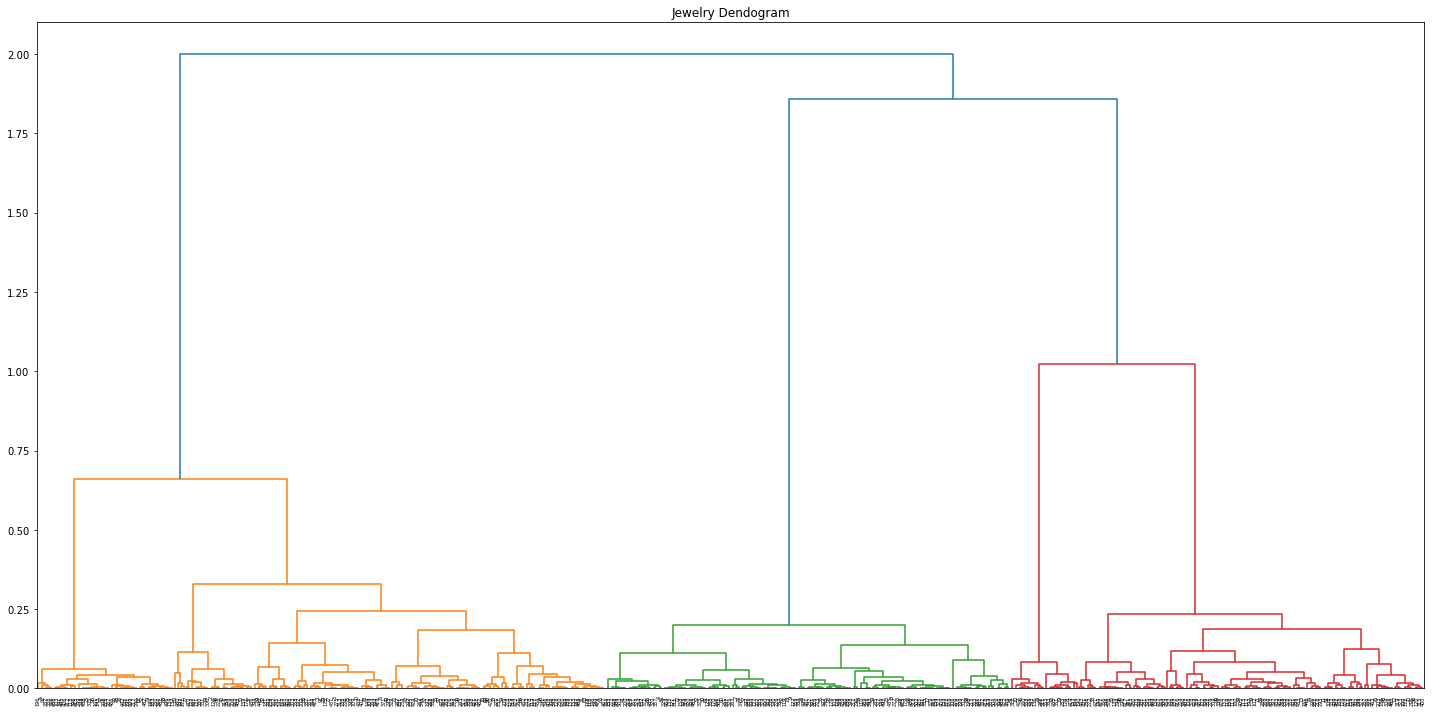

In [21]:
#Building HIERARCHICAL using hyper parameters that generated highest Silhouette score 
hei = scipy.cluster.hierarchy.linkage(X, method = 'complete', metric = 'cosine')

#Using k=5 to cut the dendogram to get 5 clusters
labels_hei = scipy.cluster.hierarchy.fcluster(hei, 5, criterion="maxclust")

#Silhouette Score calculation for the final model
sil_hei1= silhouette_score(X , labels_hei, metric='cosine')
print('\nSilhouette Score Hierarchical model: ' +str(sil_hei1))

#Plot the dendogram
plt.figure(figsize=(20, 10)) 
plt.title("Jewelry Dendogram")  
dend = scipy.cluster.hierarchy.dendrogram(hei)